In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
meta = pd.read_csv("../../release_in_the_wild/meta.csv")

In [3]:
meta

,file,speaker,label
0,0.wav,Alec Guinness,spoof
1,1.wav,Alec Guinness,spoof
2,2.wav,Barack Obama,spoof
3,3.wav,Alec Guinness,spoof
4,4.wav,Christopher Hitchens,bona-fide
...,...,...,...
31774,31774.wav,Boris Johnson,bona-fide
31775,31775.wav,Donald Trump,bona-fide
31776,31776.wav,Donald Trump,bona-fide
31777,31777.wav,Alan Watts,bona-fide


In [4]:
meta['speaker'].value_counts()

speaker
Barack Obama                3636
Alec Guinness               3625
Donald Trump                3423
Bernie Sanders              2877
Ayn Rand                    2493
Bill Clinton                1832
Ronald Reagan               1536
Christopher Hitchens        1339
Winston Churchill            882
Martin Luther King           799
JFK                          669
Milton Friedman              589
Mark Zuckerberg              582
FDR                          471
Queen Elizabeth II           464
Louis Farrakhan              410
Alexandria Ocasio-Cortez     390
Nelson Mandela               381
Alan Watts                   378
Richard Nixon                359
Arnold Schwarzenegger        351
The Notorious B.I.G.         329
Boris Johnson                295
Dwight Eisenhower            268
George Carlin                248
George W. Bush               230
Adam Driver                  217
Gilbert Gottfried            208
Orson Welles                 202
Bill Burr                    201
Ma

In [5]:
meta['label'].value_counts(), meta['label'].value_counts('s')

(label
 bona-fide    19963
 spoof        11816
 Name: count, dtype: int64,
 label
 bona-fide    0.628182
 spoof        0.371818
 Name: proportion, dtype: float64)

In [11]:
import librosa
import librosa.display
import IPython.display as ipd

In [22]:
audio_files = meta['file']

In [23]:
audio_files = [str('../../release_in_the_wild/' + f) for f in audio_files]

In [24]:
audio_files[0]

'../../release_in_the_wild/0.wav'

In [93]:
meta['speaker'][100]

'Alexandria Ocasio-Cortez'

In [25]:
ipd.Audio(audio_files[100])

In [52]:
y, sr = librosa.load(audio_files[111])
print(y.shape, sr)

(57949,) 22050


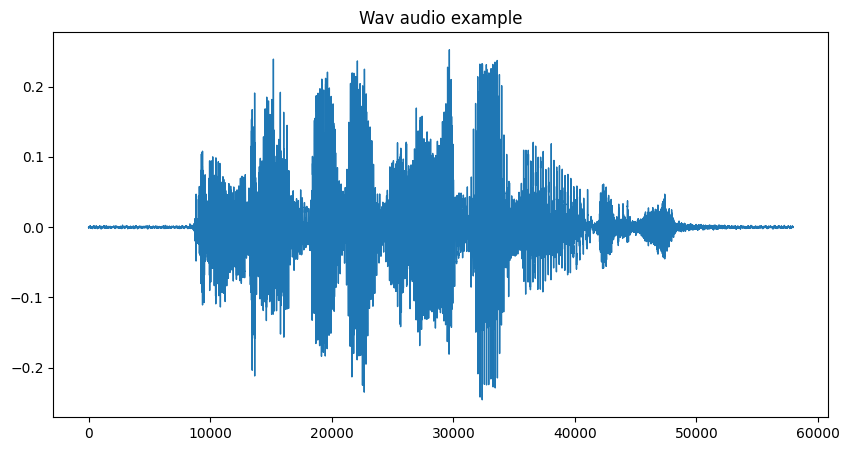

In [53]:
pd.Series(y).plot(figsize=(10,5),
                  lw=1,
                  title="Wav audio example")
plt.show()

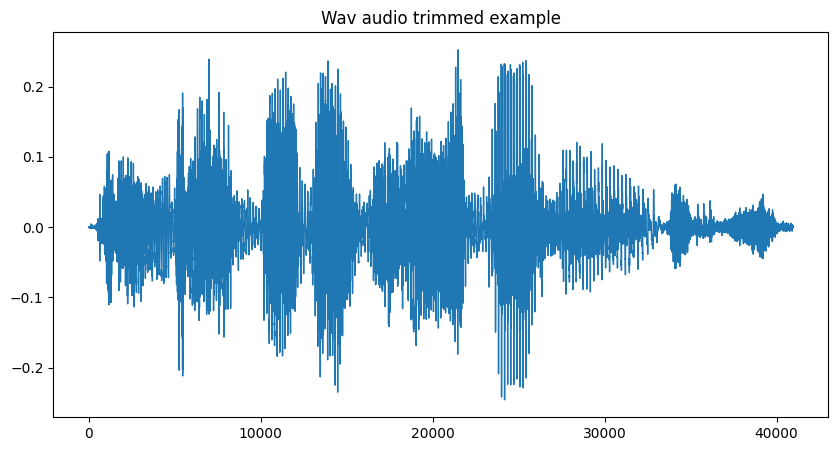

In [55]:
y_trimmed, _ = librosa.effects.trim(y, top_db=29)

pd.Series(y_trimmed).plot(figsize=(10,5),
                  lw=1,
                  title="Wav audio trimmed example")
plt.show()

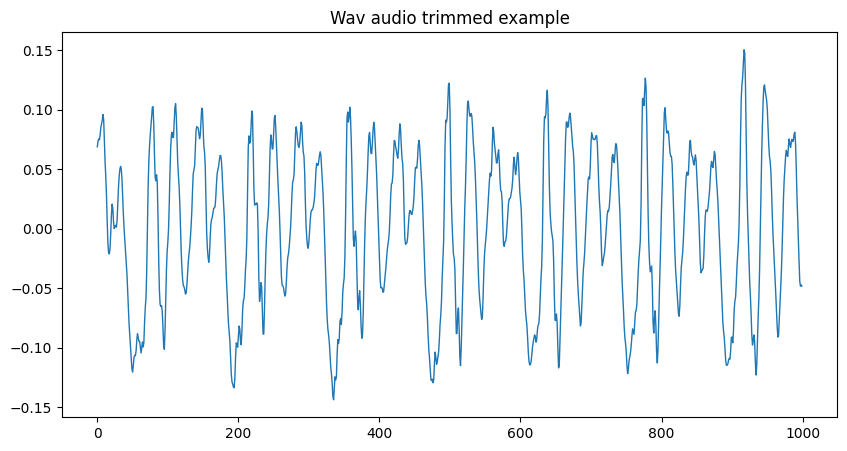

In [58]:
pd.Series(y_trimmed[20000:21000]).plot(figsize=(10,5),
                  lw=1,
                  title="Wav audio trimmed example")
plt.show()

In [61]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 114)

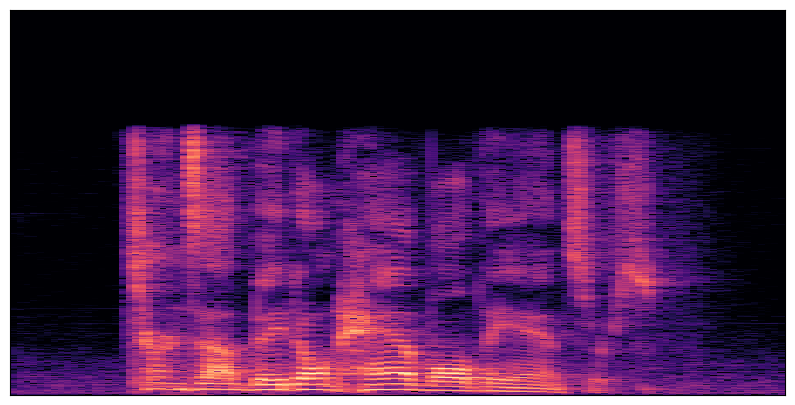

In [85]:
fig, ax = plt.subplots(figsize=(10,5))

img = librosa.display.specshow(S_db, 
                               ax=ax)

plt.show()

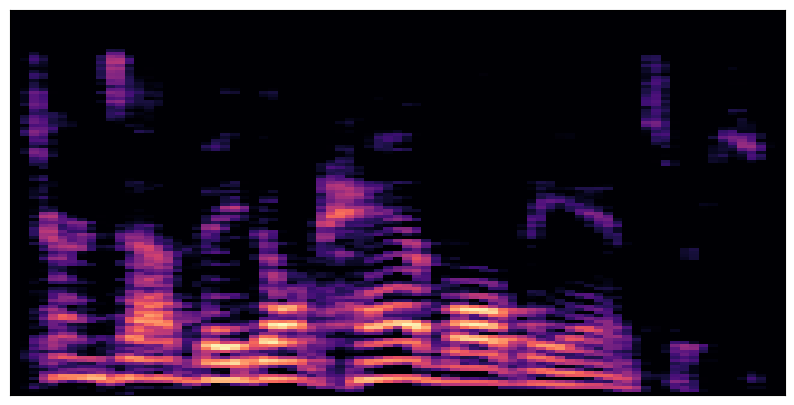

In [80]:
S = librosa.feature.melspectrogram(y=y_trimmed, sr=sr)

S_db_mel = librosa.amplitude_to_db(np.abs(S), ref=np.max)

fig, ax = plt.subplots(figsize=(10,5))

img = librosa.display.specshow(S_db_mel, 
                               ax=ax)

plt.show()

In [83]:
S_db_mel

array([[-80.     , -80.     , -80.     , ..., -80.     , -80.     ,
        -80.     ],
       [-80.     , -80.     , -77.94544, ..., -80.     , -80.     ,
        -80.     ],
       [-80.     , -77.29538, -65.44864, ..., -76.48268, -80.     ,
        -80.     ],
       ...,
       [-80.     , -80.     , -80.     , ..., -80.     , -80.     ,
        -80.     ],
       [-80.     , -80.     , -80.     , ..., -80.     , -80.     ,
        -80.     ],
       [-80.     , -80.     , -80.     , ..., -80.     , -80.     ,
        -80.     ]], dtype=float32)

In [86]:
import os
print(os.getcwd())

/Users/eamon/Desktop/AIM/deepfake-project


In [90]:
meta['label'][:120].value_counts('%')

label
bona-fide    0.616667
spoof        0.383333
Name: proportion, dtype: float64

In [91]:
meta['label'][:1000].value_counts('%')

label
bona-fide    0.633
spoof        0.367
Name: proportion, dtype: float64

In [92]:
meta['label'][1000:1200].value_counts('%')

label
bona-fide    0.665
spoof        0.335
Name: proportion, dtype: float64